In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [50]:
x = np.linspace(0.1, 100, 1000)
y = ((np.log(x))*(x))

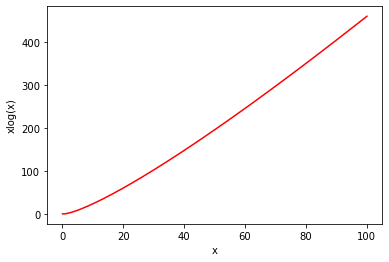

In [54]:
plt.plot(x, y, color = 'red')
plt.xlabel('x')
plt.ylabel('xlog(x)')
plt.show()

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

In [7]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [8]:
sigma_square = 1
kernel1 = sigma_square * RBF(length_scale= 1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gaussian_process.fit(x, y)
gaussian_process.kernel_

128**2 * RBF(length_scale=1.18)

In [68]:
x_test = pd.DataFrame(np.linspace(0.1, 100, 20))
y_test = pd.DataFrame(np.log(x_test) * x_test)

In [69]:
mean_prediction = gaussian_process.predict(x_test)

Text(0, 0.5, 'xlog(x)')

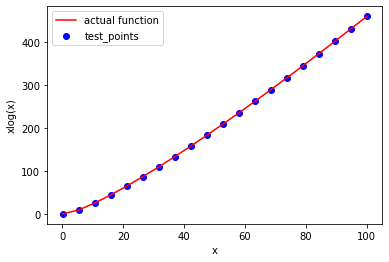

In [70]:
plt.plot(x_test.values, y_test.values, color = 'red')
plt.scatter(x_test.values, mean_prediction, color = 'blue')
plt.legend(['actual function', 'test_points'])
plt.xlabel('x')
plt.ylabel('xlog(x)')